# 라이브러리 불러오기

In [1]:
# 데이터 전처리
import pandas as pd
import numpy as np
import sys
import pickle
import itertools

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 딥러닝 모델
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBClassifier
import joblib # 모델 저장 및 로딩하는 라이브러리
import warnings
np.set_printoptions(threshold = sys.maxsize) # NumPY에서 출력되는 배열의 요소 수 제한을 설정하는 함수
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [2]:
df = pd.read_csv('./data/핀성형기_가동정보_데이터.csv', index_col = 0)

df

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


# 데이터 처리

In [3]:
start_on = df[df['MAKING1_START'] == 1]

start_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


In [4]:
start_off = df[df['MAKING1_START'] == 0]

start_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155517,0,1,37003.501149,116.273176,117.364652,115.867543,116.350981,1.926936,1.789745,3.020391,2.233814,0.624643,0.305668,32.883881,37.698801,931.575843,443.903394
155518,0,1,37003.501149,116.458039,117.123537,116.113661,116.708886,1.913739,1.710895,3.022865,2.199447,0.624643,0.307923,33.021347,38.004305,931.575843,443.903394
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394


In [5]:
stop_on = df[df['MAKING1_STOP'] == 1]

stop_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394
155521,0,1,37004.051011,116.523363,117.237689,116.186133,116.660444,1.895869,1.675429,3.020611,2.190814,0.624643,0.303469,32.854244,38.086124,931.575843,443.903394
155522,1,1,37004.051011,116.379629,117.648380,115.487863,116.832825,1.819603,1.670645,2.859831,2.113504,0.615845,0.301269,32.854244,37.890538,931.575843,443.903394


In [6]:
stop_off = df[df['MAKING1_STOP'] == 0]

stop_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


# 훈련용 데이터 셋 만들기

## 종속변수 = START(ON/OFF) 데이터 셋

In [7]:
X = np.array(df.iloc[:, 2:]) # start빼고
Y_start = np.array(df.iloc[:, 0])
Y_start = Y_start.reshape(-1, 1)

## 종속변수 = STOP(ON/OFF) 데이터 셋

In [8]:
X = np.array(df.iloc[:, 2:]) # stop빼고
Y_stop = np.array(df.iloc[:, 1])
Y_stop = Y_stop.reshape(-1, 1)

# 모델링

## 종속변수 = START(ON/OFF) 모델

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_start, test_size = 0.3, shuffle = True, random_state = 1004)

## 기본 모델

accuracy 0.9951178451178451
precision 0.9951477902227973
recall 0.9954698054443231
f1 0.9953087717879241

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22797
           1       1.00      1.00      1.00     24723

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520


TN, FP, FN, TP :  22677 120 112 24611


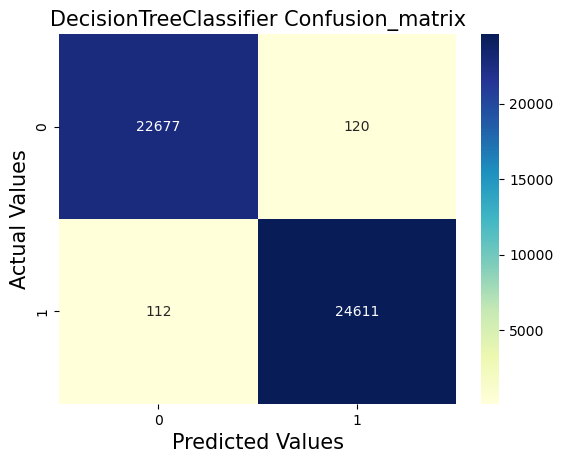

In [10]:
clf = DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, prediction))
print('precision', precision_score(y_test, prediction))
print('recall', recall_score(y_test, prediction))
print('f1', f1_score(y_test, prediction))

print()

print(classification_report(y_test, prediction))

print()

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('DecisionTreeClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

### 학습 곡선 그리기

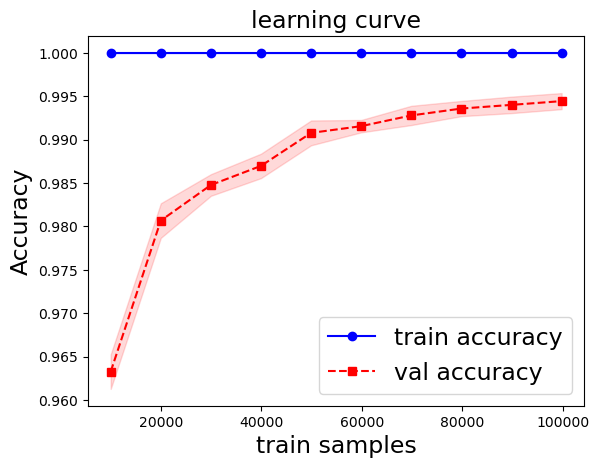

In [11]:
# 학습곡선
# learning_curve함수에서 교차검증에 의한 정답률을 계산
train_size, train_scores, test_scores = learning_curve(estimator = clf, X = X_train, y = y_train,
                                                      train_sizes = np.linspace(0.1, 1.0, 10), cv = 10, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_size, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(train_size, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

# fill_between 함수에서 평균+-표준편차의 폭을 빈틈없이 칠하기
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('learning curve', fontsize = 17)
plt.xlabel('train samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)

### 오차 그래프 그리기

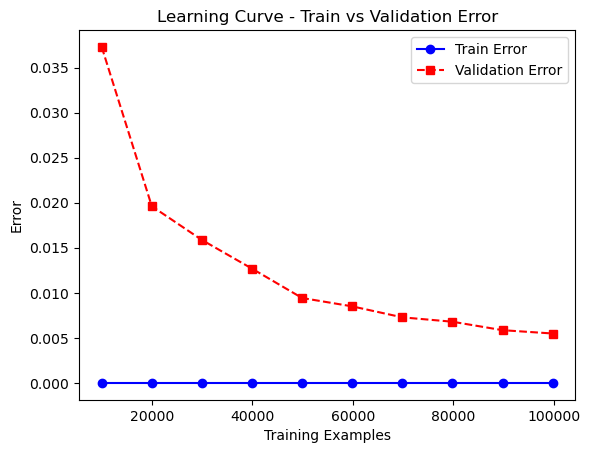

In [12]:
# learning_curve 함수에서 교차검증에 의한 정답률을 계산
train_sizes, train_scores, test_scores = learning_curve(estimator = clf, X = X_train, y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        cv = 10, n_jobs = 1)

# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Learning Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')

###  검증 곡선 그리기

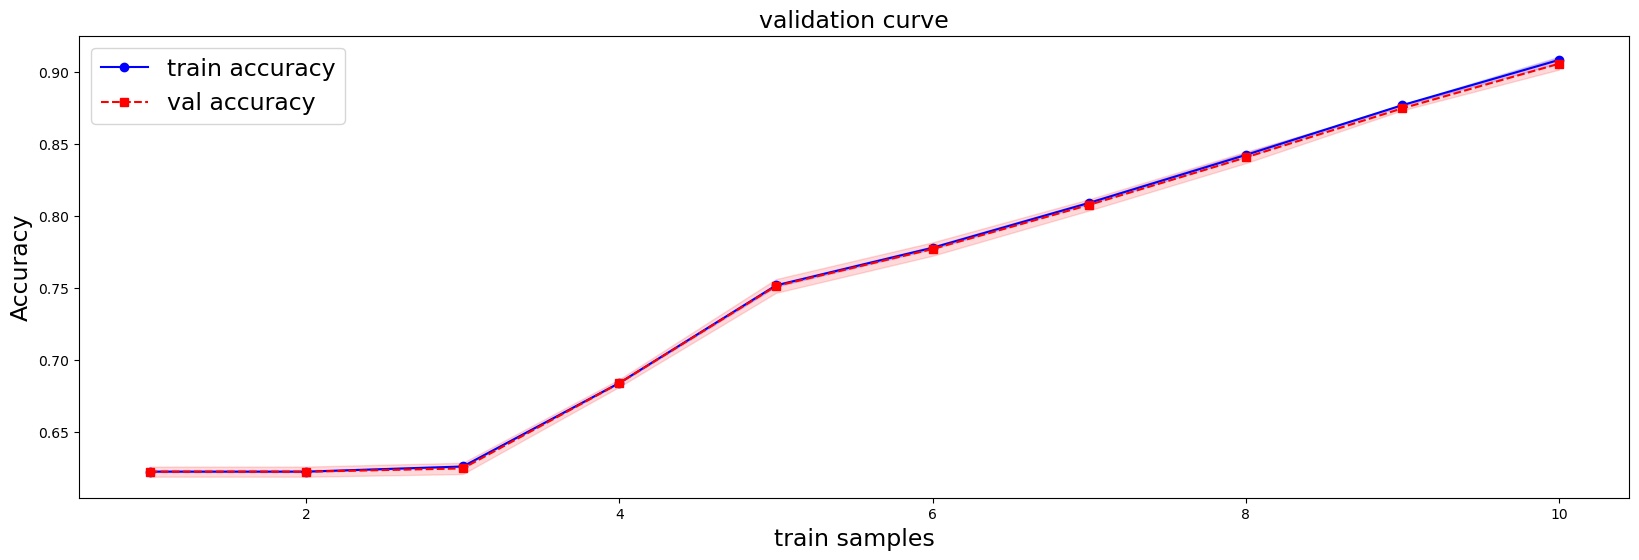

In [13]:
# 검증곡선
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(estimator = clf, X = X_train, y = y_train,
                                           cv = 10, n_jobs = 1,
                                           param_name = "max_depth",
                                           param_range = param_range)# 값의 범위 지정)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# 검증 곡선 그리기
plt.figure(figsize=(20, 6))
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(param_range, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

# fill_between 함수에서 평균+-표준편차의 폭을 빈틈없이 칠하기
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('validation curve', fontsize = 17)
plt.xlabel('train samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)

### 오차 그래프 그리기

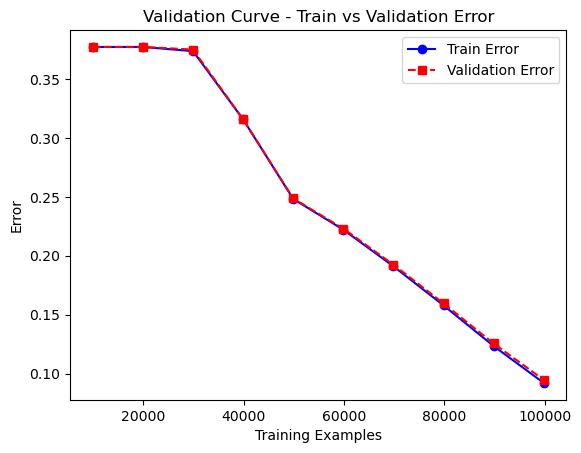

In [14]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(estimator = clf, X = X_train, y = y_train,
                                           cv = 10, n_jobs = 1,
                                           param_name = "max_depth",
                                           param_range = param_range)# 값의 범위 지정)

# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Validation Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')

## 기본모델 - 과소적합 해결 후

accuracy 0.9922138047138047
precision 0.9915627144644947
recall 0.9934878453262145
f1 0.9925243463854204

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22797
           1       0.99      0.99      0.99     24723

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP :  22588 209 161 24562


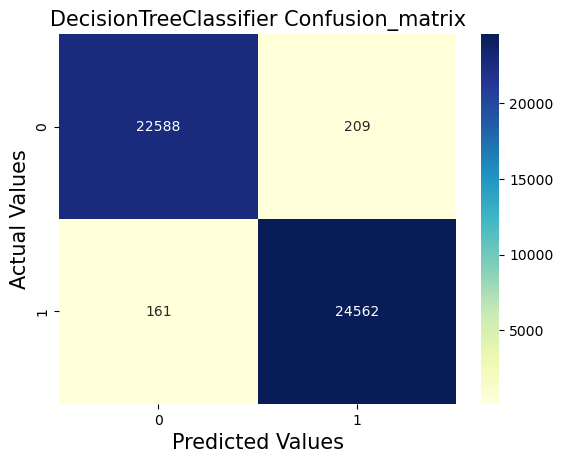

In [15]:
clf = DecisionTreeClassifier(criterion = 'gini',  # 분할 기준: 'gini' 또는 'entropy'
                             max_depth = 20,  # 트리의 최대 깊이. None으로 설정하면 제한 없음.
                             min_samples_split = 10,  # 노드를 분할하기 위한 최소 샘플 수
                             min_samples_leaf = 2,  # 리프 노드에 필요한 최소 샘플 수
                             max_features = None,  # 각 노드에서 고려할 최대 특성 수
                             random_state = 42)  # 재현성을 위한 랜덤 시드
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(y_test, prediction))
print('precision', precision_score(y_test, prediction))
print('recall', recall_score(y_test, prediction))
print('f1', f1_score(y_test, prediction))

print()

print(classification_report(y_test, prediction))

print()

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('DecisionTreeClassifier Confusion_matrix', size = 15)

tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("TN, FP, FN, TP : ", tn, fp, fn, tp)  

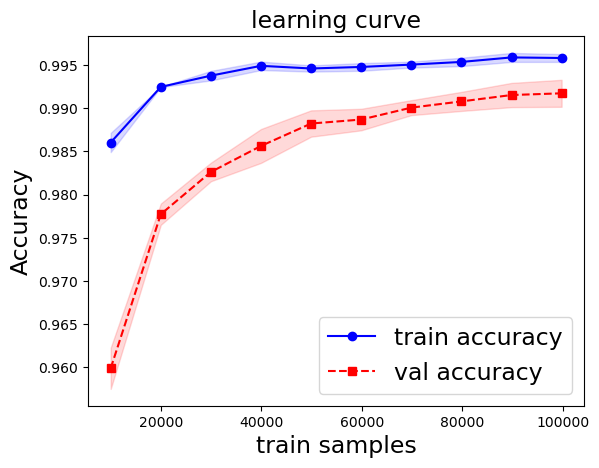

In [16]:
# 학습곡선
# learning_curve함수에서 교차검증에 의한 정답률을 계산
train_size, train_scores, test_scores = learning_curve(estimator = clf, X = X_train, y = y_train,
                                                      train_sizes = np.linspace(0.1, 1.0, 10), cv = 10, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_size, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(train_size, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

# fill_between 함수에서 평균+-표준편차의 폭을 빈틈없이 칠하기
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('learning curve', fontsize = 17)
plt.xlabel('train samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)

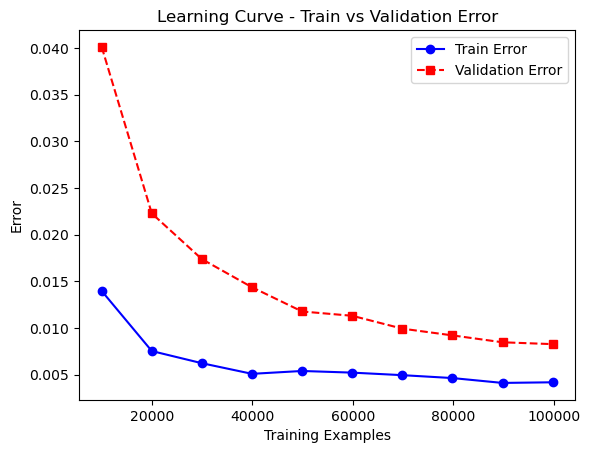

In [17]:
# learning_curve 함수에서 교차검증에 의한 정답률을 계산
train_sizes, train_scores, test_scores = learning_curve(estimator = clf, X = X_train, y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        cv = 10, n_jobs = 1)

# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Learning Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')

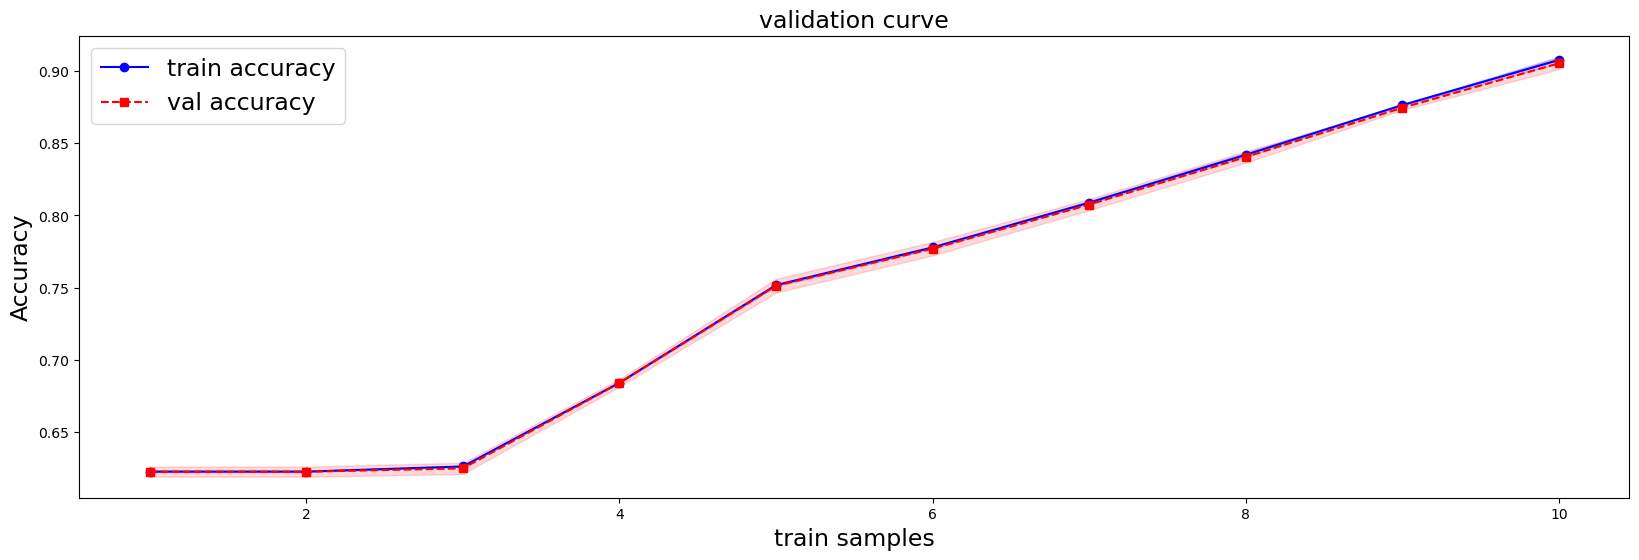

In [18]:
# 검증곡선
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(estimator = clf, X = X_train, y = y_train,
                                           cv = 10, n_jobs = 1,
                                           param_name = "max_depth",
                                           param_range = param_range)# 값의 범위 지정)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# 검증 곡선 그리기
plt.figure(figsize=(20, 6))
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(param_range, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

# fill_between 함수에서 평균+-표준편차의 폭을 빈틈없이 칠하기
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('validation curve', fontsize = 17)
plt.xlabel('train samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)

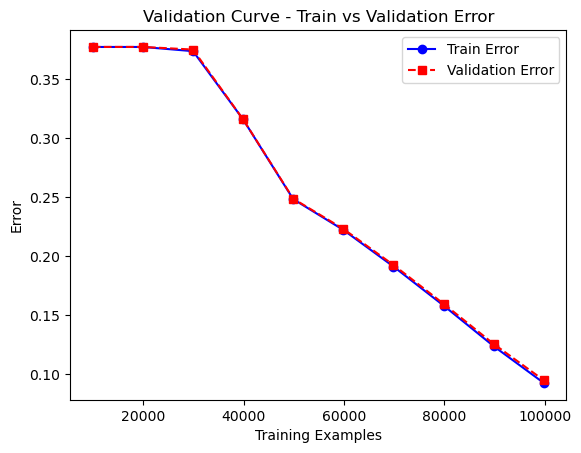

In [19]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(estimator = clf, X = X_train, y = y_train,
                                           cv = 10, n_jobs = 1,
                                           param_name = "max_depth",
                                           param_range = param_range)# 값의 범위 지정)

# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Validation Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')

## 교차 검증

In [20]:
# 과적합이 발생한 듯 하여 교차 검증으로 확인하기

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
cv_accuracy = []

n_iter = 0
for train_ind, test_ind in kfold.split(X, Y_start):
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = Y_start[train_ind], Y_start[test_ind]
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print('\n{}교차 검증 정확도 : {}'.format(n_iter, accuracy))
    cv_accuracy.append(accuracy)
    
print('\n평균 검증 정확도 : {}'.format(np.round(np.mean(cv_accuracy), 4)))


1교차 검증 정확도 : 0.9932

2교차 검증 정확도 : 0.9938

3교차 검증 정확도 : 0.9934

4교차 검증 정확도 : 0.9938

5교차 검증 정확도 : 0.9929

6교차 검증 정확도 : 0.9917

7교차 검증 정확도 : 0.9915

8교차 검증 정확도 : 0.9939

9교차 검증 정확도 : 0.9914

10교차 검증 정확도 : 0.9927

평균 검증 정확도 : 0.9928


###  교차 검증 결과에서 학습 곡선 그리기

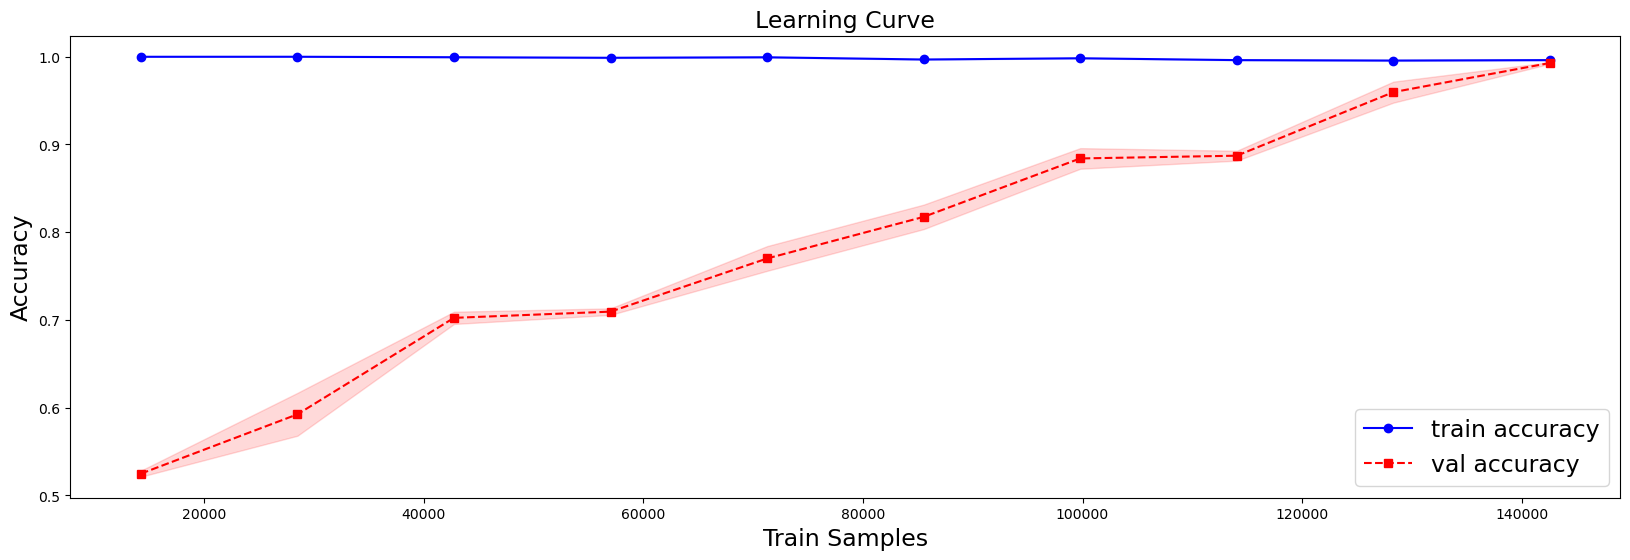

In [21]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(estimator = clf, X = X, y = Y_start,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        cv = kfold, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis= 1 )

plt.figure(figsize=(20, 6))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(train_sizes, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('Learning Curve', fontsize = 17)
plt.xlabel('Train Samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)
plt.show()


### 교차 검증 결과에서 오차 그래프 그리기

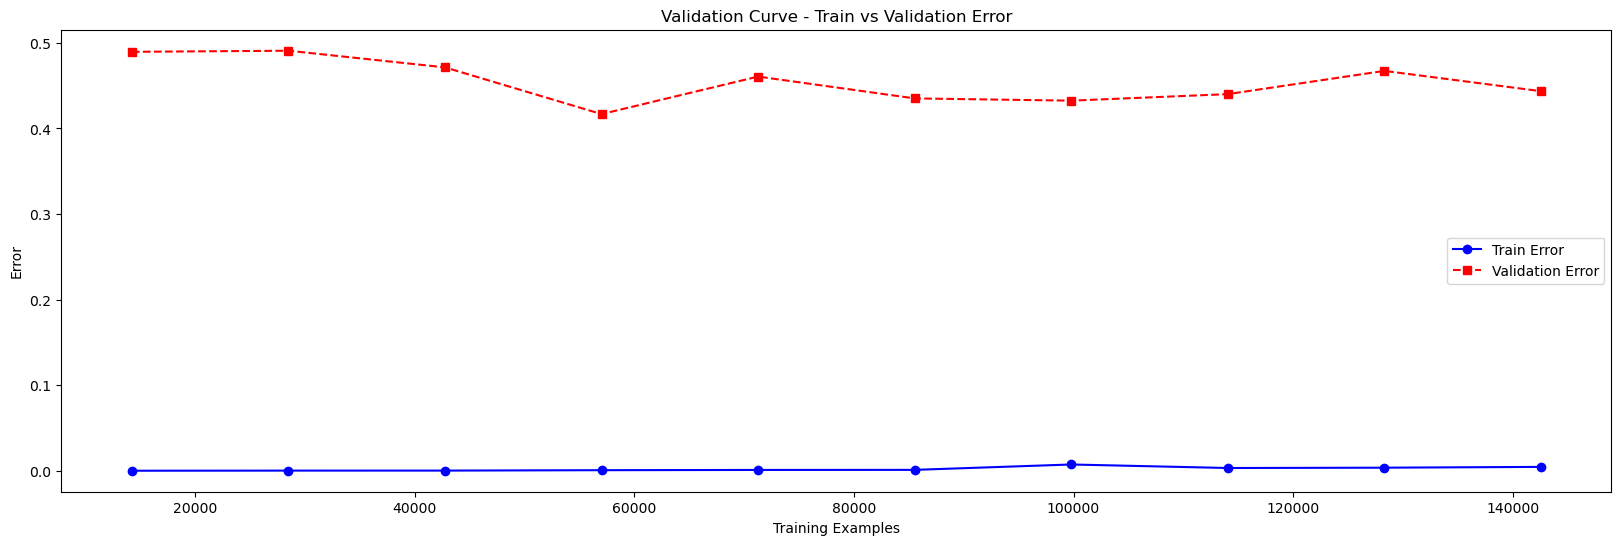

In [24]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

train_sizes, train_scores, test_scores = learning_curve(estimator = clf, X = X, y = Y_start,
                                                        cv = 10, n_jobs = 1,
                                                        train_sizes = np.linspace(0.1, 1.0, 10))
# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.figure(figsize=(20, 6))
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Validation Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')

### 교차 검증 결과에서 검증 곡선 그리기

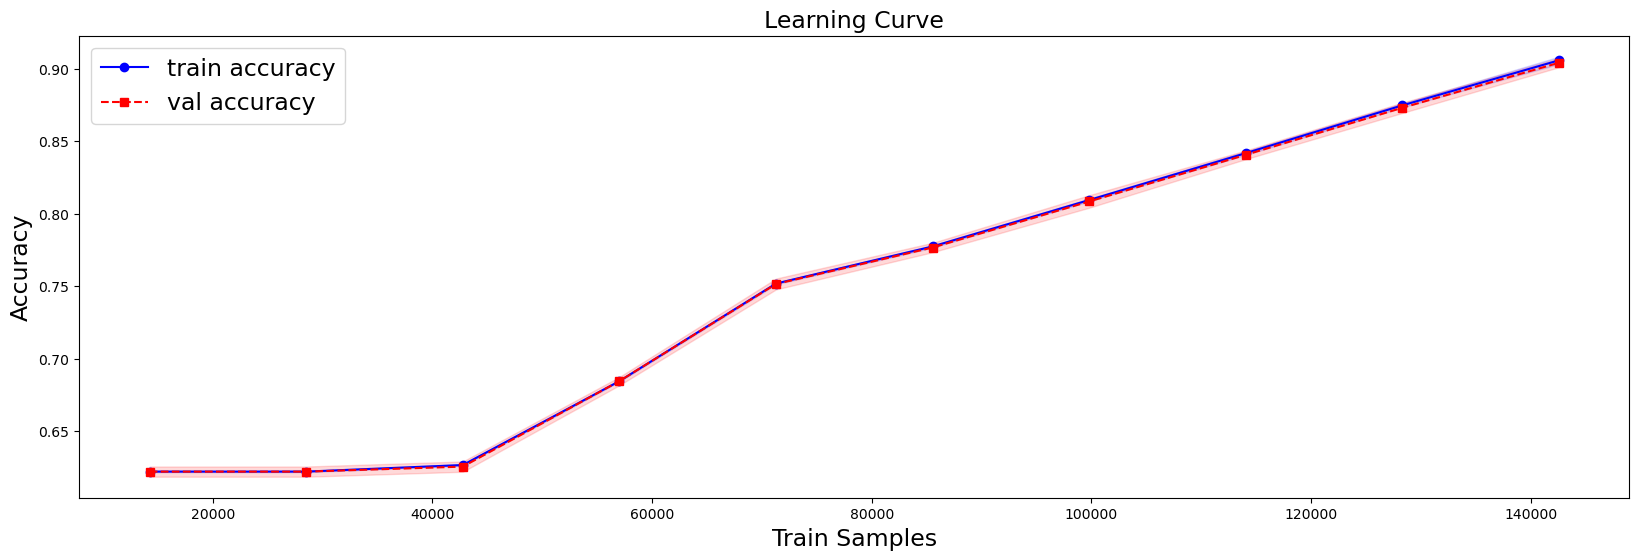

In [25]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(estimator = clf, X = X, y = Y_start,
                                                        param_name = "max_depth",
                                                        param_range = param_range,
                                                        cv = kfold, n_jobs = 1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis= 1 )

plt.figure(figsize=(20, 6))
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', label = 'train accuracy')
plt.plot(train_sizes, test_mean, color = 'red', linestyle = '--', marker = 's', label = 'val accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'red')

plt.title('Learning Curve', fontsize = 17)
plt.xlabel('Train Samples', fontsize = 17)
plt.ylabel('Accuracy', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)
plt.show()


### 교차 검증 결과에서 오차 그래프 그리기

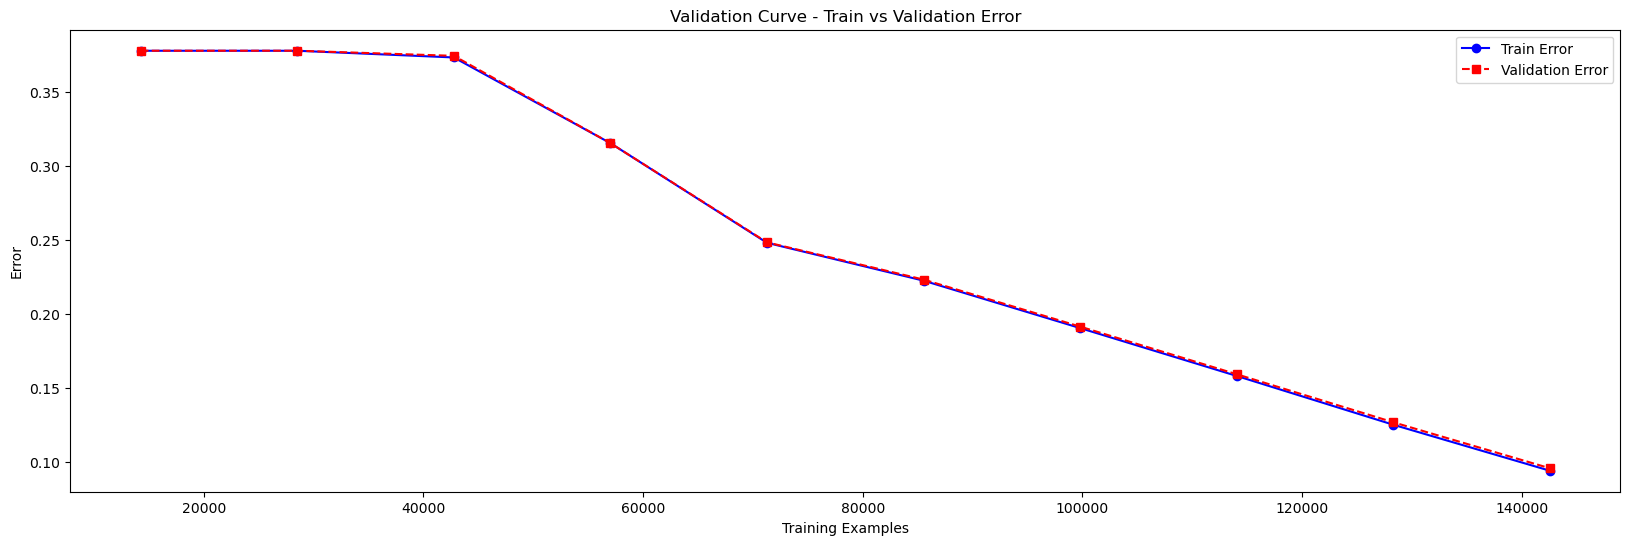

In [27]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

train_scores, test_scores = validation_curve(estimator = clf, X = X, y = Y_start,
                                                        param_name = "max_depth",
                                                        param_range = param_range,
                                                        cv = kfold, n_jobs = 1)
# 훈련 세트와 검증 세트의 오차 계산
train_errors = 1 - np.mean(train_scores, axis = 1)
test_errors = 1 - np.mean(test_scores, axis = 1)

# 학습 곡선 그리기
plt.figure(figsize=(20, 6))
plt.plot(train_sizes, train_errors, color = 'blue', marker = 'o', label = 'Train Error')
plt.plot(train_sizes, test_errors, color = 'red', marker = 's', linestyle = '--', label = 'Validation Error')
plt.title('Validation Curve - Train vs Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend(loc='best')